In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

In [2]:
df = pd.read_csv("/content/dermatology_database_1.csv")

In [3]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna()
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"SVM Accuracy (Before Outlier Removal): {svm_accuracy:.4f}")
print(f"Random Forest Accuracy (Before Outlier Removal): {rf_accuracy:.4f}")

SVM Accuracy (Before Outlier Removal): 0.9861
Random Forest Accuracy (Before Outlier Removal): 0.9861


In [6]:
z_scores = np.abs(zscore(X))
outlier_indices = np.where(z_scores > 3)
df_cleaned = df[(z_scores < 3).all(axis=1)]


In [9]:
X_clean = df_cleaned.drop(columns=['class'])
y_clean = df_cleaned['class']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42) # Removed stratify

In [10]:
svm_model.fit(X_train_clean, y_train_clean)
svm_pred_clean = svm_model.predict(X_test_clean)
svm_accuracy_clean = accuracy_score(y_test_clean, svm_pred_clean)


SVM Accuracy (After Outlier Removal): 0.9216
Random Forest Accuracy (After Outlier Removal): 0.9608


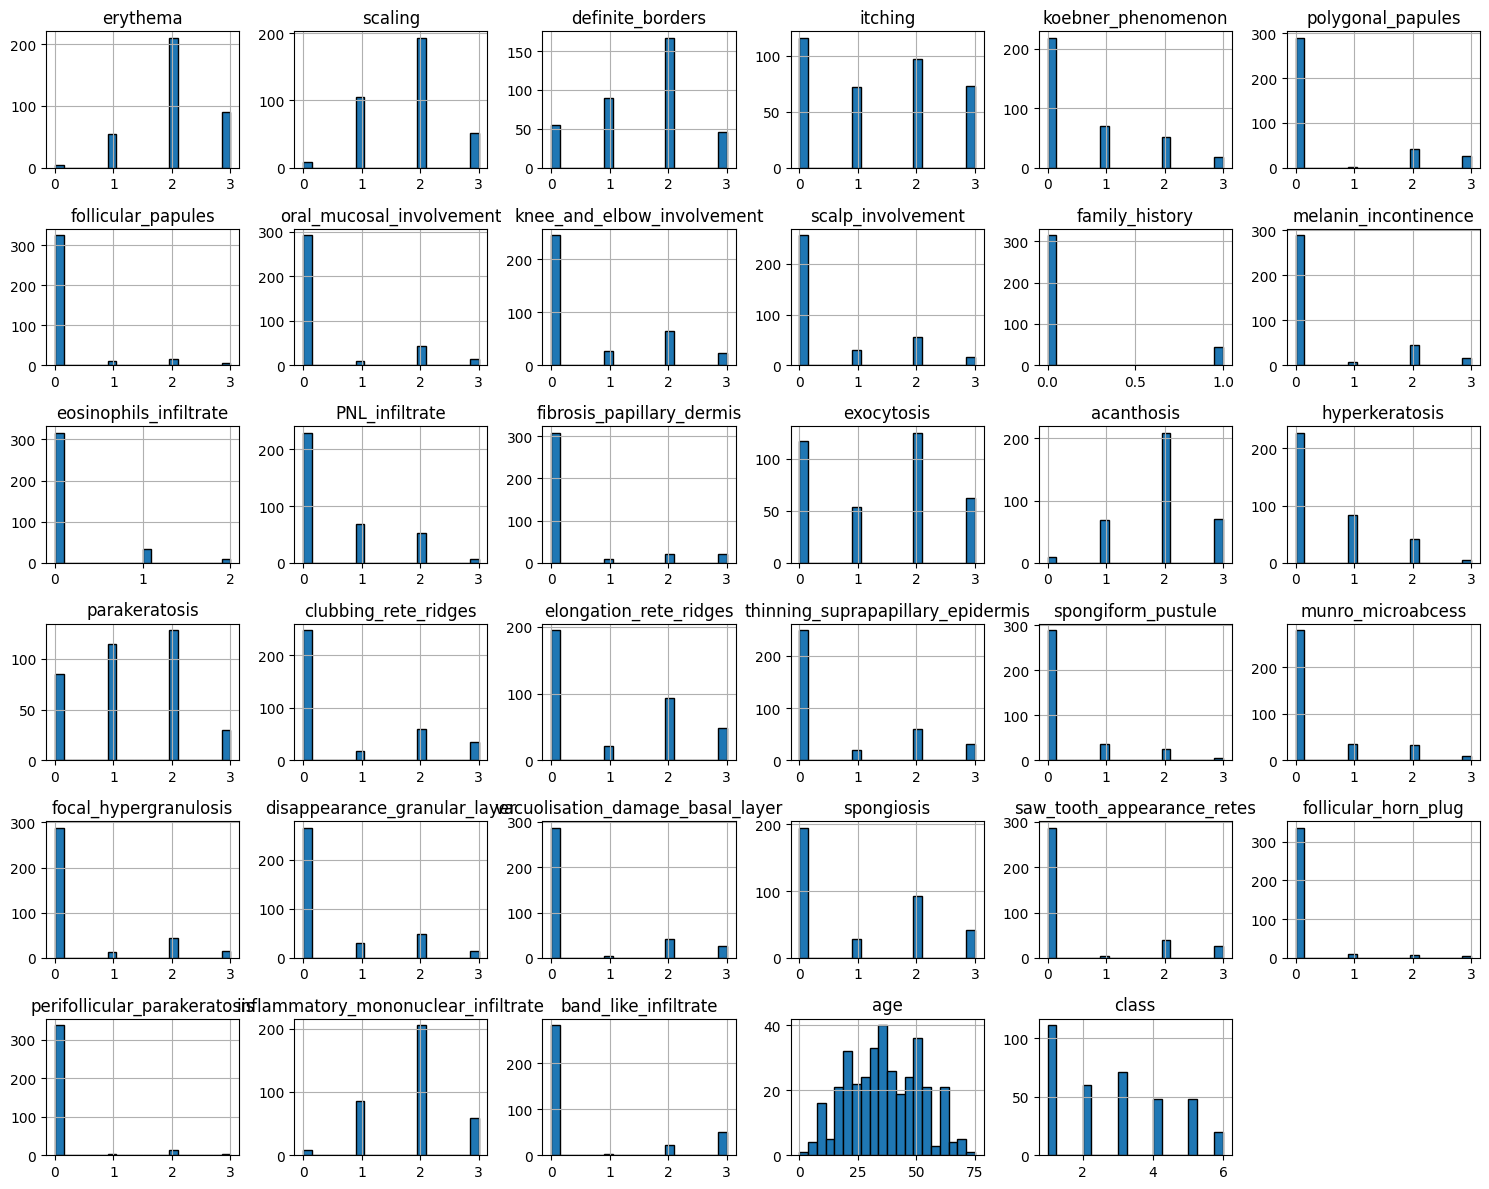

In [11]:
rf_model.fit(X_train_clean, y_train_clean)
rf_pred_clean = rf_model.predict(X_test_clean)
rf_accuracy_clean = accuracy_score(y_test_clean, rf_pred_clean)

print(f"SVM Accuracy (After Outlier Removal): {svm_accuracy_clean:.4f}")
print(f"Random Forest Accuracy (After Outlier Removal): {rf_accuracy_clean:.4f}")

df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()
